# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations:

 1. First observation is when reviewing the city latitude vs max temperature, the higher temperatures started to peak at +20 latitude. 
 2. Second observation was taken from both the Northern and Southern Hemisphere Humidity vs latitude linear regression.   There is a significant increase in humidity in the northern hemisphere rather than the southern. 
 3. Third observation was taken from both the Northern and Southern Hemisphere Cloudiness vs latitude linear regression.   The northern hemisphere has more cloudy days than the southern hemisphere. 





In [1]:
#Dependencies: 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import pprint 
import scipy.stats as st
from citipy import citipy
from scipy.stats import linregress

#Import API Key: 
from api_keys import weather_api_key
from api_keys import g_key

In [2]:
# #Output File (CSV)
# output_data_file = "output_data/cities.csv"

#Googled Latidutes and Longitues:
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for lat_lngs and cities:
lat_lngs = []
cities = []

# Create a set of random lat and lng combos:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for lat, lng 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create url
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
# weather_url = url + weather_api_key
# weather_url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_url = url + weather_api_key
weather_url = f"{url}appid={weather_api_key}&units={units}&q="

print(weather_url)

http://api.openweathermap.org/data/2.5/weather?appid=1468e93b2c670f3c11ae06f1d6ff0c19&units=imperial&q=


In [5]:
#create lists: 
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1
      

print("Beginning Data Retrieval ")
print("-----------------------------")



# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(weather_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : new norfolk
Processing Record 2 of Set 1 : albany
Processing Record 3 of Set 1 : vaini
Processing Record 4 of Set 1 : east wenatchee bench
Processing Record 5 of Set 1 : puerto del rosario
Processing Record 6 of Set 1 : dingle
Processing Record 7 of Set 1 : emerald
Processing Record 8 of Set 1 : hobyo
Processing Record 9 of Set 1 : puerto ayora
Processing Record 10 of Set 1 : ulladulla
Processing Record 11 of Set 1 : solnechnyy
Processing Record 12 of Set 1 : bonthe
Processing Record 13 of Set 1 : bandarbeyla
Processing Record 14 of Set 1 : busselton
Processing Record 15 of Set 1 : ushuaia
Processing Record 16 of Set 1 : nouadhibou
Processing Record 17 of Set 1 : cherskiy
Processing Record 18 of Set 1 : calama
Processing Record 19 of Set 1 : weyburn
Processing Record 20 of Set 1 : bambous virieux
Processing Record 21 of Set 1 : shenkursk
Processing Record 22 of Set 1 : castro
Processing Record 23 of 

Processing Record 39 of Set 4 : gustavo diaz ordaz
Processing Record 40 of Set 4 : da lat
Processing Record 41 of Set 4 : fortuna
Processing Record 42 of Set 4 : chara
City not found. Skipping...
Processing Record 43 of Set 4 : dunedin
Processing Record 44 of Set 4 : port-gentil
Processing Record 45 of Set 4 : tiksi
Processing Record 46 of Set 4 : vanavara
Processing Record 47 of Set 4 : atuona
City not found. Skipping...
Processing Record 48 of Set 4 : fukue
Processing Record 49 of Set 4 : ribeira grande
Processing Record 50 of Set 4 : navirai
Processing Record 0 of Set 5 : leshukonskoye
Processing Record 1 of Set 5 : manakara
Processing Record 2 of Set 5 : antofagasta
Processing Record 3 of Set 5 : bilibino
Processing Record 4 of Set 5 : ballina
Processing Record 5 of Set 5 : maningrida
Processing Record 6 of Set 5 : mount gambier
Processing Record 7 of Set 5 : tamala
Processing Record 8 of Set 5 : fairbanks
Processing Record 9 of Set 5 : plettenberg bay
Processing Record 10 of Set 5

City not found. Skipping...
Processing Record 23 of Set 8 : egvekinot
Processing Record 24 of Set 8 : walvis bay
Processing Record 25 of Set 8 : port keats
City not found. Skipping...
Processing Record 26 of Set 8 : along
Processing Record 27 of Set 8 : tuatapere
Processing Record 28 of Set 8 : churapcha
Processing Record 29 of Set 8 : bowling green
Processing Record 30 of Set 8 : jamame
Processing Record 31 of Set 8 : neuquen
Processing Record 32 of Set 8 : christchurch
Processing Record 33 of Set 8 : yozgat
Processing Record 34 of Set 8 : warwick
Processing Record 35 of Set 8 : vestmannaeyjar
Processing Record 36 of Set 8 : celestun
City not found. Skipping...
Processing Record 37 of Set 8 : hasaki
City not found. Skipping...
Processing Record 38 of Set 8 : ouallam
Processing Record 39 of Set 8 : rundu
Processing Record 40 of Set 8 : kavieng
Processing Record 41 of Set 8 : ordubad
Processing Record 42 of Set 8 : pitsunda
Processing Record 43 of Set 8 : pangody
Processing Record 44 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create DataFrame
weather_data = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list            
                
})
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,66.99,33,92,5.01,AU,1603242446
1,Albany,42.60,-73.97,57.99,82,100,3.62,US,1603242388
2,Vaini,-21.20,-175.20,77.00,69,75,10.29,TO,1603242446
3,East Wenatchee Bench,47.43,-120.28,55.40,43,1,4.70,US,1603242446
4,Puerto del Rosario,28.50,-13.86,73.40,78,40,2.24,ES,1603241861


In [7]:
#Save as csv
weather_data.to_csv("output_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#There are no cities w/ Humidity > 100%
humidity = weather_data.loc[weather_data["Humidity"] > 100]
humidity.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

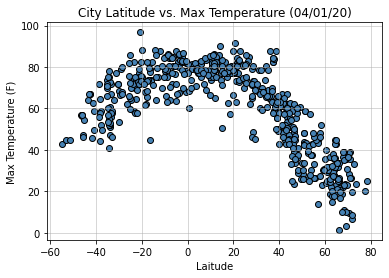

In [11]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Output/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

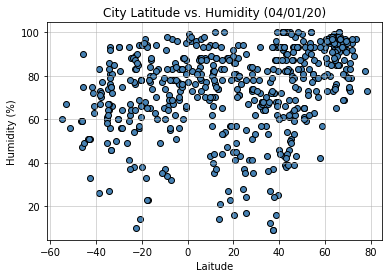

In [12]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Output/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

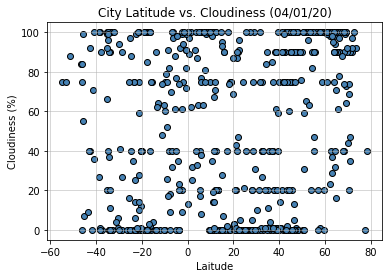

In [13]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")
# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Output/City Latitude vs Max Cloudiness.png")

## Latitude vs. Wind Speed Plot

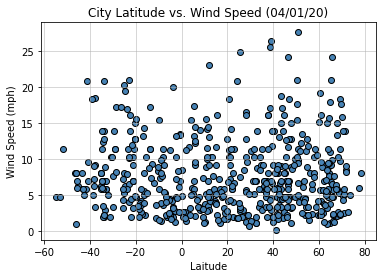

In [14]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#Set title
plt.title("City Latitude vs. Wind Speed (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Output/City Latitude vs Wind Speed.png")

## Linear Regression

In [15]:
#Create DataFrame for Northern and Southern Hemisphere: 
northern_hemisphere = weather_data.loc[weather_data["Lat"].astype(float) >= 0,:]
southern_hemisphere = weather_data.loc[weather_data["Lat"].astype (float) < 0, :]
# northern_hemisphere.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7781841786093866


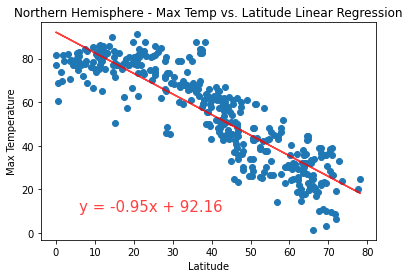

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png");

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.482660794687333


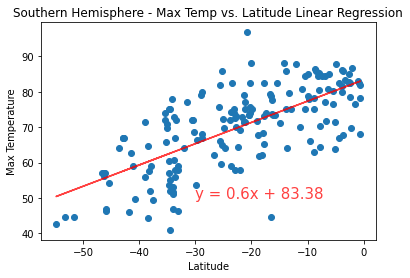

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(-30,50),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07030699403196983


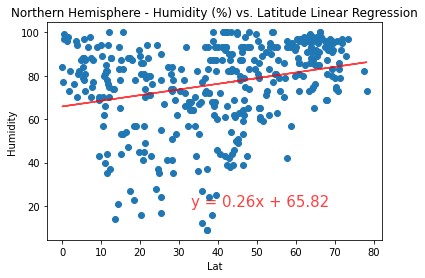

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(33,20),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Output/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03871326181341144


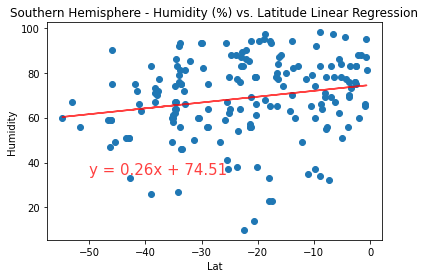

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(-50,35),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Output/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08585779287538127


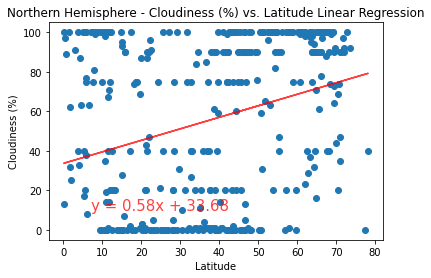

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",alpha=0.75)
plt.annotate(line_eq,(7,10),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003883248691951647


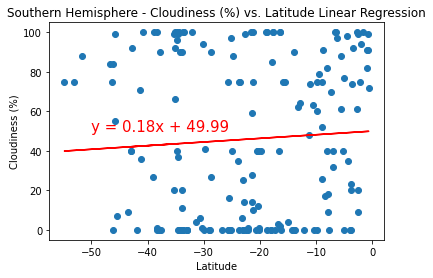

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0659596463649747


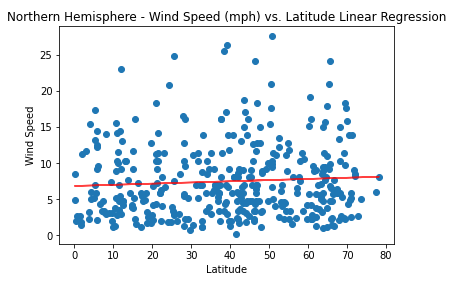

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(1,30),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

plt.savefig("Output/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.016123208241624956


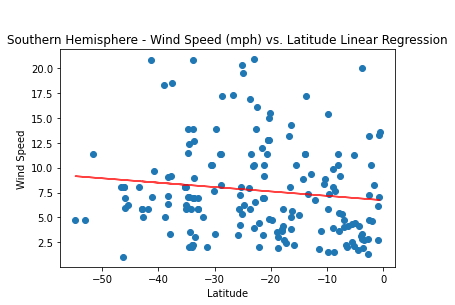

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", alpha=0.75)
plt.annotate(line_eq,(-25,25),fontsize=15,color="red", alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue**2}")
plt.show()

plt.savefig("Output/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")